In [47]:
import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

pd.set_option("display.max_columns", 100)
%matplotlib inline

import os

# TAD

* Edad
* Zipcode
* Percapita income by zipcode
* yearli income
* total debt
* FICO Score
* numCredit Cards
* CreditLimit

* Total de transacciones -> count
* Total de transacciones (EU, Extranjero, online) -> count
* Media de tansacciones (EU, Extranjero, online) -> mean

* (Monto máximo de transacción y sacar el porcentaje)
* Monto -> media, el total historico gastado

In [35]:
data_path = '../../data/modulo3/dataexam2/'

In [36]:
os.listdir(data_path)

['.DS_Store', 'TAD.csv', 'tablas_juntasf.parquet']

In [37]:
df = pd.read_csv(data_path +  'TAD.csv')

In [38]:
df.head()

Person  CurrentAge  FICOScore  Zipcode  YearlyIncome_Person  \
0  Aaden Campbell          33        763     4074              59613.0   
1  Aaliyah Martin          43        704    32504              45360.0   
2    Aarav Farhad          48        673    10460              27447.0   
3   Aarav Jenkins          49        681    76301              27943.0   
4       Abby Wood          54        716    98122              76431.0   

   TotalDebt  NumCreditCards  TotalAmount  AvgAmount  MaxAmount  MinAmount  \
0    36199.0               4    969024.54      61.72    1128.47       0.65   
1    14587.0               3    671014.64      38.02     937.15       0.27   
2    80850.0               5    544412.89      35.61     534.84       0.08   
3    18693.0               4    359531.09      47.77     990.20       0.39   
4   115362.0               5   1175467.17      49.70    1631.50       0.13   

   TotalTransactions  USTrans  OnlineTrans  AbroadTrans  AvgUSAmount  \
0              15701    14218         1162          321        53.26   
1              17649    10992         6603           54        28.74   
2              15287    14319          968            0        31.78   
3               7526     6793          729            4        42.80   
4              23651    22506          658          487        44.82   

   AvgOnlineAmount  AvgAbroadAmount  
0             7.01             1.45  
1             9.00             0.28  
2             3.83             0.00  
3             4.95             0.03  
4             3.89             0.99

In [39]:
df.shape

(1993, 18)

<AxesSubplot:>

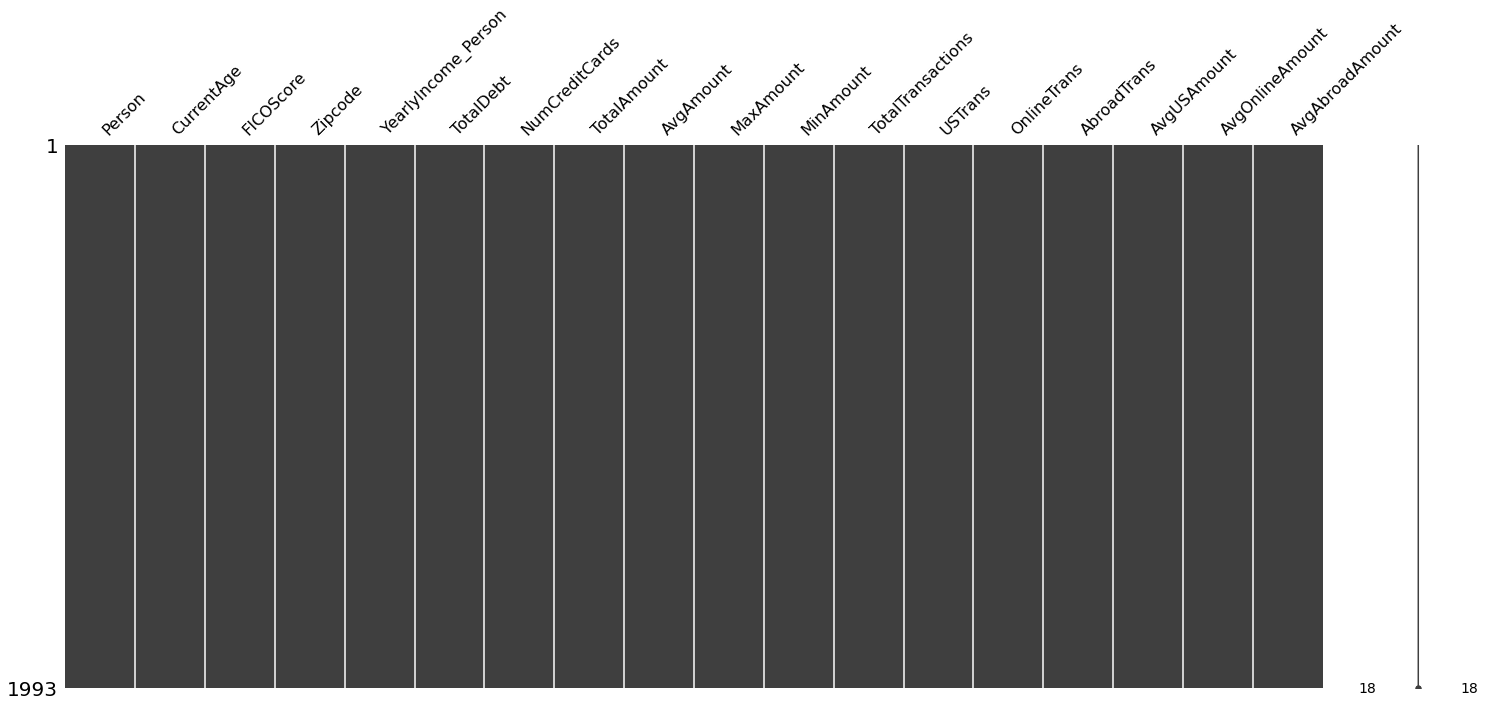

In [40]:
msno.matrix(df)

In [44]:
df.describe()

CurrentAge    FICOScore       Zipcode  YearlyIncome_Person  \
count  1993.000000  1993.000000   1993.000000          1993.000000   
mean     45.410437   709.690918  50509.627195         45733.340692   
std      18.422886    67.113790  29368.111113         23018.729414   
min      18.000000   480.000000   1060.000000             1.000000   
25%      30.000000   681.000000  28212.000000         32820.000000   
50%      44.000000   711.000000  46307.000000         40787.000000   
75%      58.000000   753.000000  77081.000000         52680.000000   
max     101.000000   850.000000  99508.000000        307018.000000   

           TotalDebt  NumCreditCards   TotalAmount    AvgAmount     MaxAmount  \
count    1993.000000     1993.000000  1.993000e+03  1993.000000   1993.000000   
mean    63760.474160        3.071249  6.583044e+05    54.585374   1192.828354   
std     52294.548141        1.638499  6.459298e+05    19.499620    826.667774   
min         0.000000        1.000000  1.363300e+02     5.770000     15.170000   
25%     23971.000000        2.000000  1.869222e+05    41.310000    734.410000   
50%     58373.000000        3.000000  5.552625e+05    52.070000   1099.000000   
75%     89114.000000        4.000000  9.118518e+05    65.290000   1464.500000   
max    516263.000000        9.000000  5.992498e+06   170.930000  12390.500000   

         MinAmount  TotalTransactions       USTrans   OnlineTrans  \
count  1993.000000        1993.000000   1993.000000   1993.000000   
mean      0.710592       12198.010035  10756.446061   1362.873557   
std       1.320165       10727.992565   9486.830758   2592.956717   
min       0.000000          15.000000     14.000000      0.000000   
25%       0.090000        4009.000000   3425.000000    246.000000   
50%       0.320000       10859.000000   9591.000000    644.000000   
75%       0.780000       17419.000000  15297.000000   1027.000000   
max      20.390000       82355.000000  81183.000000  26877.000000   

       AbroadTrans  AvgUSAmount  AvgOnlineAmount  AvgAbroadAmount  
count  1993.000000  1993.000000      1993.000000      1993.000000  
mean     78.690416    47.121696         6.990723         0.472905  
std     132.214844    17.791184         5.145757         1.201669  
min       0.000000     5.340000         0.000000         0.000000  
25%       0.000000    34.330000         3.550000         0.000000  
50%      34.000000    45.480000         5.580000         0.250000  
75%      90.000000    57.590000         8.940000         0.590000  
max    1513.000000   142.660000        45.820000        29.330000

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7a3a45e40> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


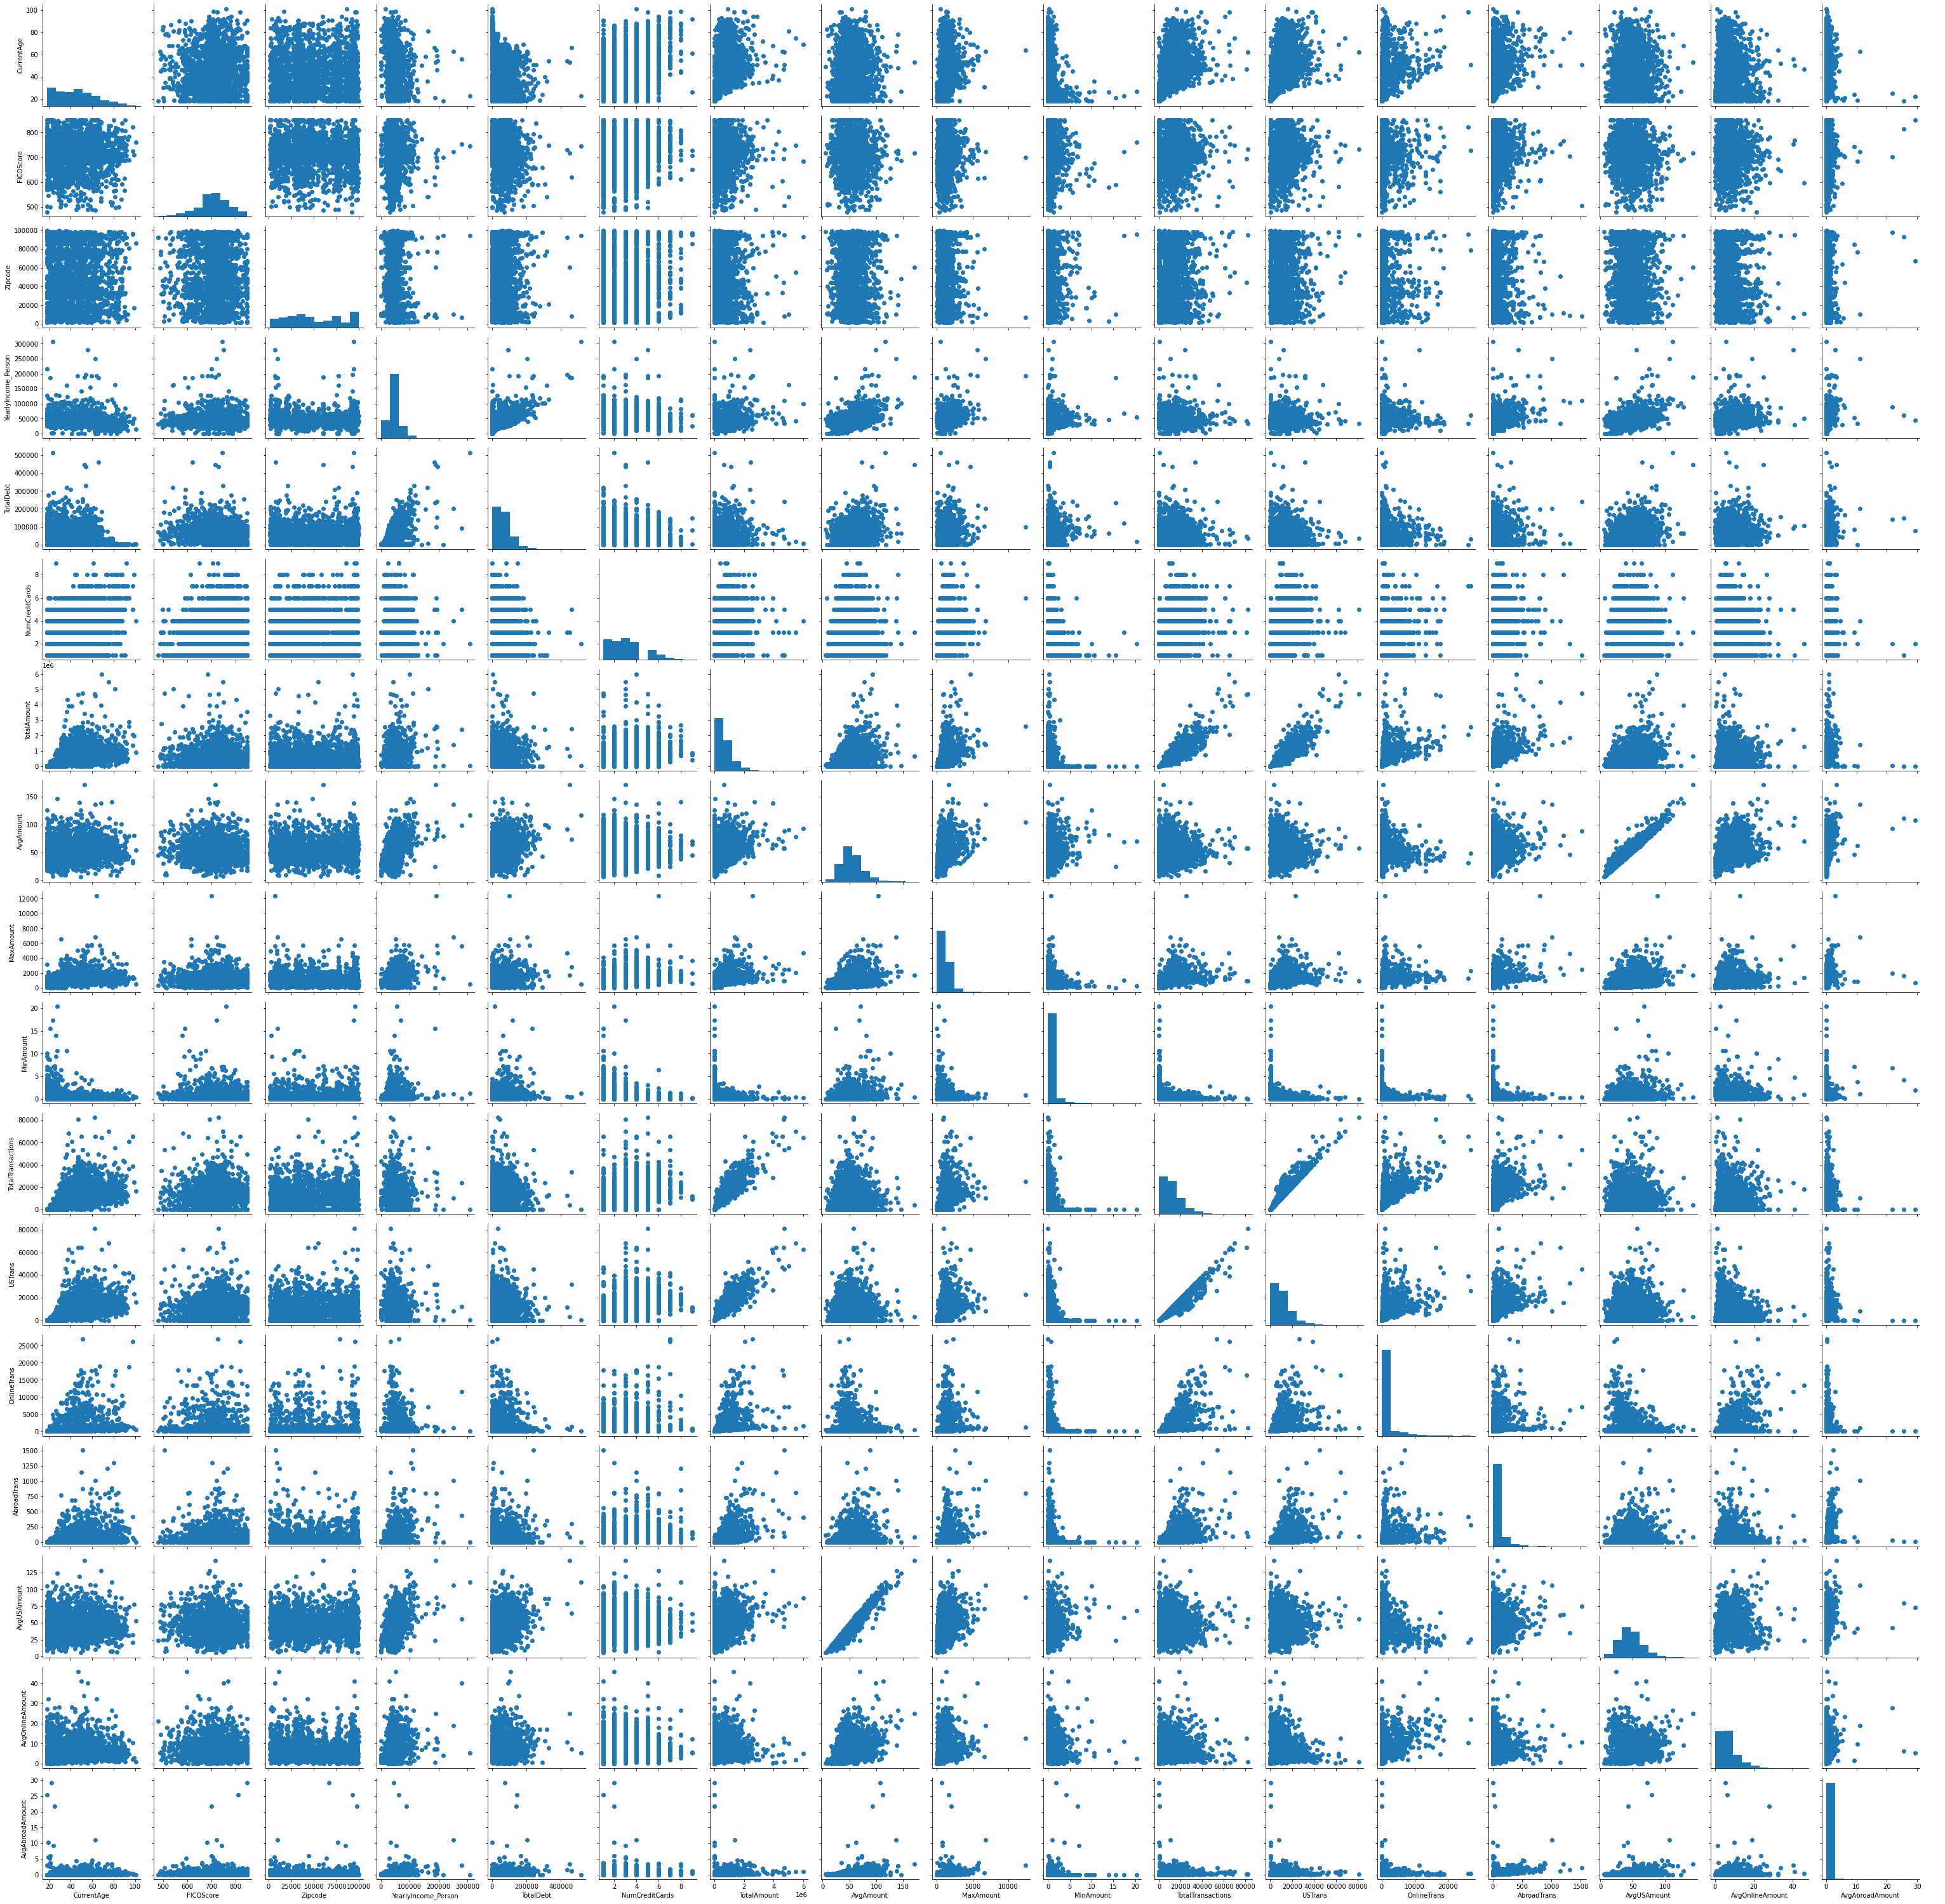

In [48]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [55]:
import sys
sys.path.insert(1, '../../script')
from dimensional_tools import DimensionalReduction
import pickle

In [49]:
rd = DimensionalReduction(df, 1)

In [50]:
rd.apply_pca?

In [54]:
df_pca, pca = rd.apply_pca(threshold=0.9, verbose=True)

INFO:
Component 1: 0.2744759580848028
Component 2: 0.18254147309605634
Component 3: 0.08633707888825384
Component 4: 0.06831956474931877
Component 5: 0.06492480976226961
Component 6: 0.058534501256223684
Component 7: 0.053586993418096564
Component 8: 0.04928752077601135
Component 9: 0.03952224714638472
Component 10: 0.03267873854315853
Explained Variance: 0.9102088857205763


In [57]:
pickle.dump(pca, open(data_path + 'pca_examen2.pkl', 'wb'))

In [ ]:
cols_mds = 

In [58]:
df_mds, mds = rd.apply_mds(dimensions=3, column_names=[],verbose=True)

Process took: 366.256204 time units.


In [59]:
pickle.dump(mds, open(data_path + 'mds_examen2.pkl', 'wb'))

In [60]:
df_mds.head()

d_1       d_2       d_3
0  0.449717  0.281680  0.232350
1  0.171553  0.142690  0.123252
2  0.350811  0.352279  0.127574
3 -0.284067 -0.044840 -0.036619
4 -0.630990  0.141600 -0.229288

In [61]:
fig = px.scatter_3d(df_mds, x='d_1', y='d_2', z='d_3')
fig.show()

In [66]:
fig = px.scatter_3d(df_pca, x='p_0', y='p_1', z='p_2')
fig.show()

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning:

The handle <matplotlib.patches.Patch object at 0x78d964340> has a label of '_nolegend_' which cannot be automatically added to the legend.



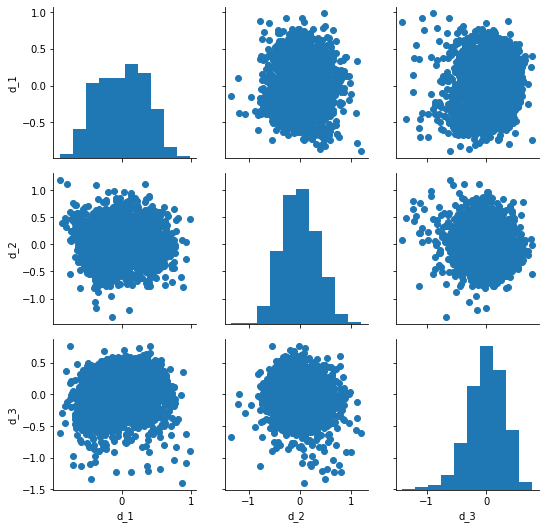

In [62]:
g = sns.PairGrid(df_mds)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning:

The handle <matplotlib.patches.Patch object at 0x67e32b010> has a label of '_nolegend_' which cannot be automatically added to the legend.



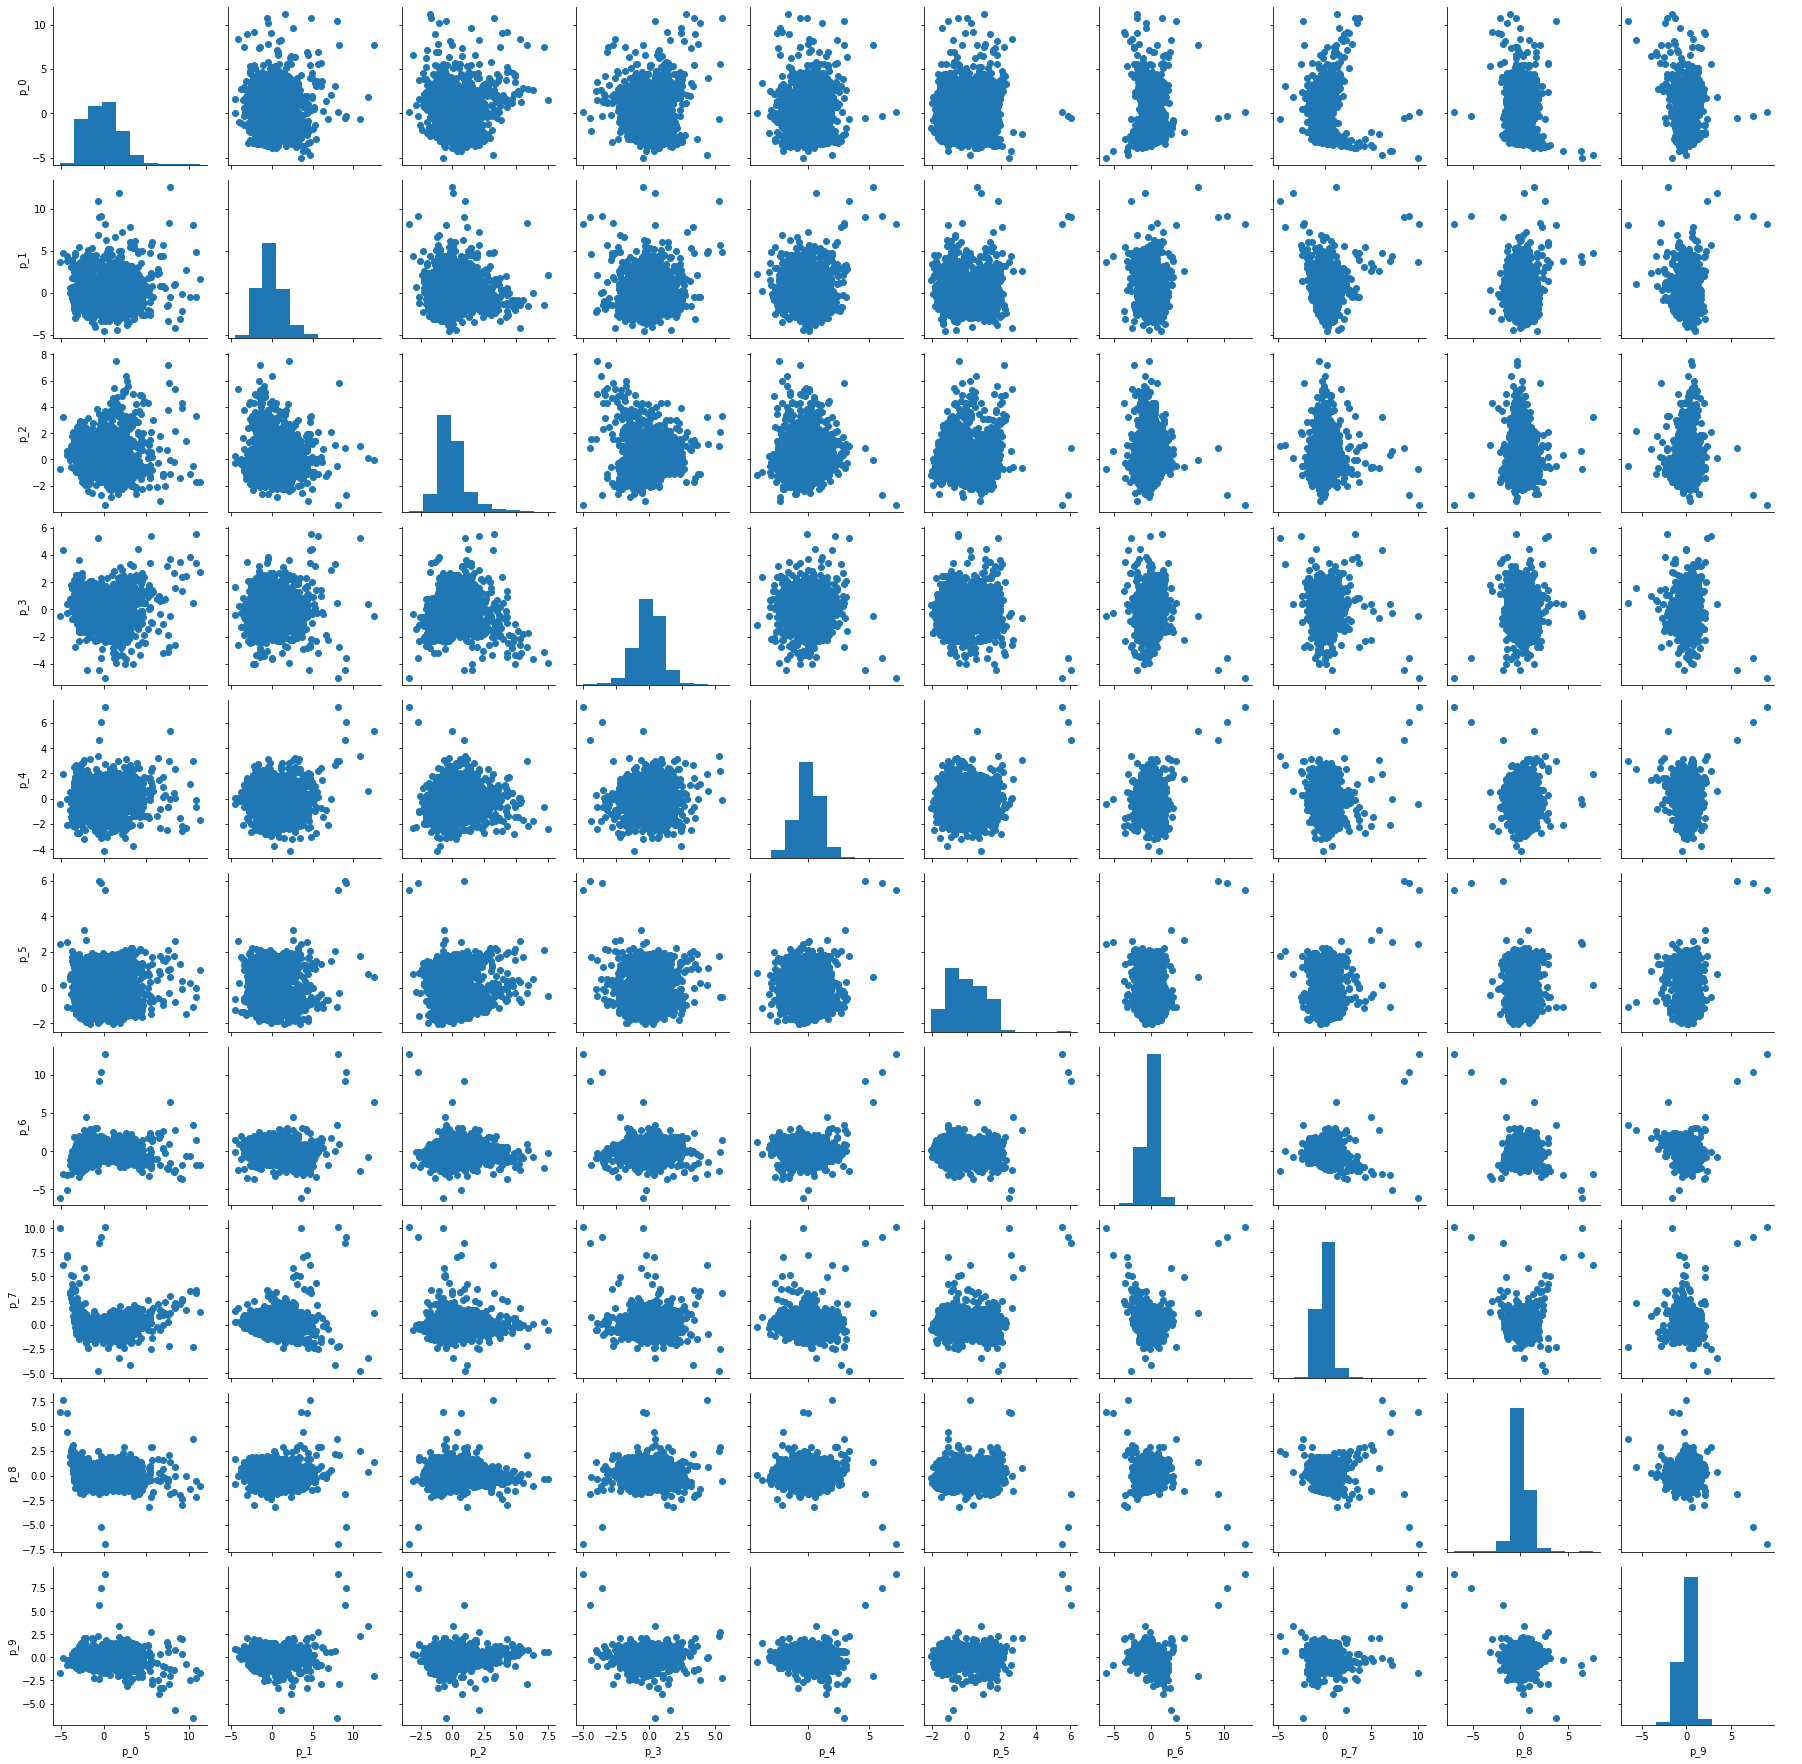

In [63]:
g = sns.PairGrid(df_pca)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();